In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib notebook
import load_raw as Raw
import seaborn as sns
from scipy.special import expit as logit

df_cleaned = pd.read_csv('/data/ortho/AllPatients.csv',  sep= ';')
#df_cleaned = df_cleaned.rename(columns={0: "thorax_r_x", 1: "thorax_r_y", 2: "thorax_r_z"})
#df_cleaned = df_cleaned.rename(columns={3: "clavicula_r_x", 4: "clavicula_r_y", 5: "clavicula_r_z"})
#df_cleaned = df_cleaned.rename(columns={6: "scapula_r_x", 7: "scapula_r_y", 8: "scapula_r_z"})
#df_cleaned = df_cleaned.rename(columns={9: "humerus_r_x", 10: "humerus_r_y", 11: "humerus_r_z"})
#df_cleaned = df_cleaned.rename(columns={12: "ellebooghoek_r"})
#df_cleaned = df_cleaned.rename(columns={15: "thorax_l_x", 16: "thorax_l_y", 17: "thorax_l_z"})
#df_cleaned = df_cleaned.rename(columns={18: "clavicula_l_x", 19: "clavicula_l_y", 20: "clavicula_l_z"})
#df_cleaned = df_cleaned.rename(columns={21: "scapula_l_x", 22: "scapula_l_y", 23: "scapula_l_z"})
#df_cleaned = df_cleaned.rename(columns={24: "humerus_l_x", 25: "humerus_l_y", 26: "humerus_l_z"})
#df_cleaned = df_cleaned.rename(columns={27: "ellebooghoek_l"})

#df_cleaned = df_cleaned.values

# x is naar voren
# y is omhoog
# z is opzij
print(df_cleaned.columns.values)
#print(df_cleaned['Oorsprong'])

['Unnamed: 0' 'thorax_r_x' 'thorax_r_y' 'thorax_r_z' 'clavicula_r_x'
 'clavicula_r_y' 'clavicula_r_z' 'scapula_r_x' 'scapula_r_y' 'scapula_r_z'
 'humerus_r_x' 'humerus_r_y' 'humerus_r_z' 'ellebooghoek_r' '13' '14'
 'thorax_l_x' 'thorax_l_y' 'thorax_l_z' 'clavicula_l_x' 'clavicula_l_y'
 'clavicula_l_z' 'scapula_l_x' 'scapula_l_y' 'scapula_l_z' 'humerus_l_x'
 'humerus_l_y' 'humerus_l_z' 'ellebooghoek_l' '28' '29' 'Oorsprong']


In [2]:

df_cleaned['clavicula_x_dif'] = np.absolute(df_cleaned['clavicula_l_x'] - df_cleaned['clavicula_r_x'])
df_cleaned['clavicula_y_dif'] = np.absolute(df_cleaned['clavicula_l_y'] - df_cleaned['clavicula_r_y'])
df_cleaned['clavicula_z_dif'] = np.absolute(df_cleaned['clavicula_l_z'] - df_cleaned['clavicula_r_z'])

df_cleaned['scapula_x_dif'] = np.absolute(df_cleaned['scapula_l_x'] - df_cleaned['scapula_r_x'])
df_cleaned['scapula_y_dif'] = np.absolute(df_cleaned['scapula_l_y'] - df_cleaned['scapula_r_y'])
df_cleaned['scapula_z_dif'] = np.absolute(df_cleaned['scapula_l_z'] - df_cleaned['scapula_r_z'])

df_cleaned['humerus_x_dif'] = np.absolute(df_cleaned['humerus_l_x'] - df_cleaned['humerus_r_x'])
df_cleaned['humerus_y_dif'] = np.absolute(df_cleaned['humerus_l_y'] - df_cleaned['humerus_r_y'])
df_cleaned['humerus_z_dif'] = np.absolute(df_cleaned['humerus_l_z'] - df_cleaned['humerus_r_z'])


param = [ 'clavicula_x_dif','clavicula_y_dif','clavicula_z_dif', 'scapula_x_dif','scapula_y_dif','scapula_z_dif', \
          'humerus_x_dif', 'humerus_y_dif', 'humerus_z_dif', \
          'humerus_l_x', 'humerus_l_y', 'humerus_l_z', 'humerus_r_x', 'humerus_r_y', 'humerus_r_z', \
          'clavicula_l_x', 'clavicula_l_y', 'clavicula_l_z', 'clavicula_r_x', 'clavicula_r_y', 'clavicula_r_z', \
          'scapula_l_x', 'scapula_l_y', 'scapula_l_z', 'scapula_r_x', 'scapula_r_y', 'scapula_r_z']
#param = ['clavicula_x_dif','clavicula_y_dif']

df_cleaned['bias'] = 1

# split oorsprong kolom in onderdelen
x,y = df_cleaned['Oorsprong'].str.split(".").str
df_cleaned['cat'],df_cleaned['pat'],df_cleaned['meting'],df_cleaned['oef'] = x.str.split("_").str
df_cleaned['cat'] = [ int(x[3:]) for x in df_cleaned['cat']] 
df_cleaned['meting'] = [ int(x[6:]) for x in df_cleaned['meting']] 
df_cleaned['oef'] = [ int(x[3:]) for x in df_cleaned['oef']] 
df_cleaned['pat'] = [ int(x[3:]) for x in df_cleaned['pat']] 
# geef ele patient een uniek nummer
df_cleaned['pat'] = df_cleaned['cat']*1000+df_cleaned['pat']

df_cleaned['c4'] = ['Cat4' in vincent for vincent in df_cleaned['Oorsprong']]
df_cleaned['c3'] = ['Cat3' in vincent for vincent in df_cleaned['Oorsprong']]
df_cleaned['c2'] = ['Cat2' in vincent for vincent in df_cleaned['Oorsprong']]
df_cleaned['c1'] = ['Cat1' in vincent for vincent in df_cleaned['Oorsprong']]

tmp = ['bias']
tmp.extend(param)
df = df_cleaned[df_cleaned.index % 20 == 0]
X = np.matrix(df[tmp])
y = np.matrix(df[['c4']])

#print(df_cleaned[['Oorsprong','c4']])

<IPython.core.display.Javascript object>


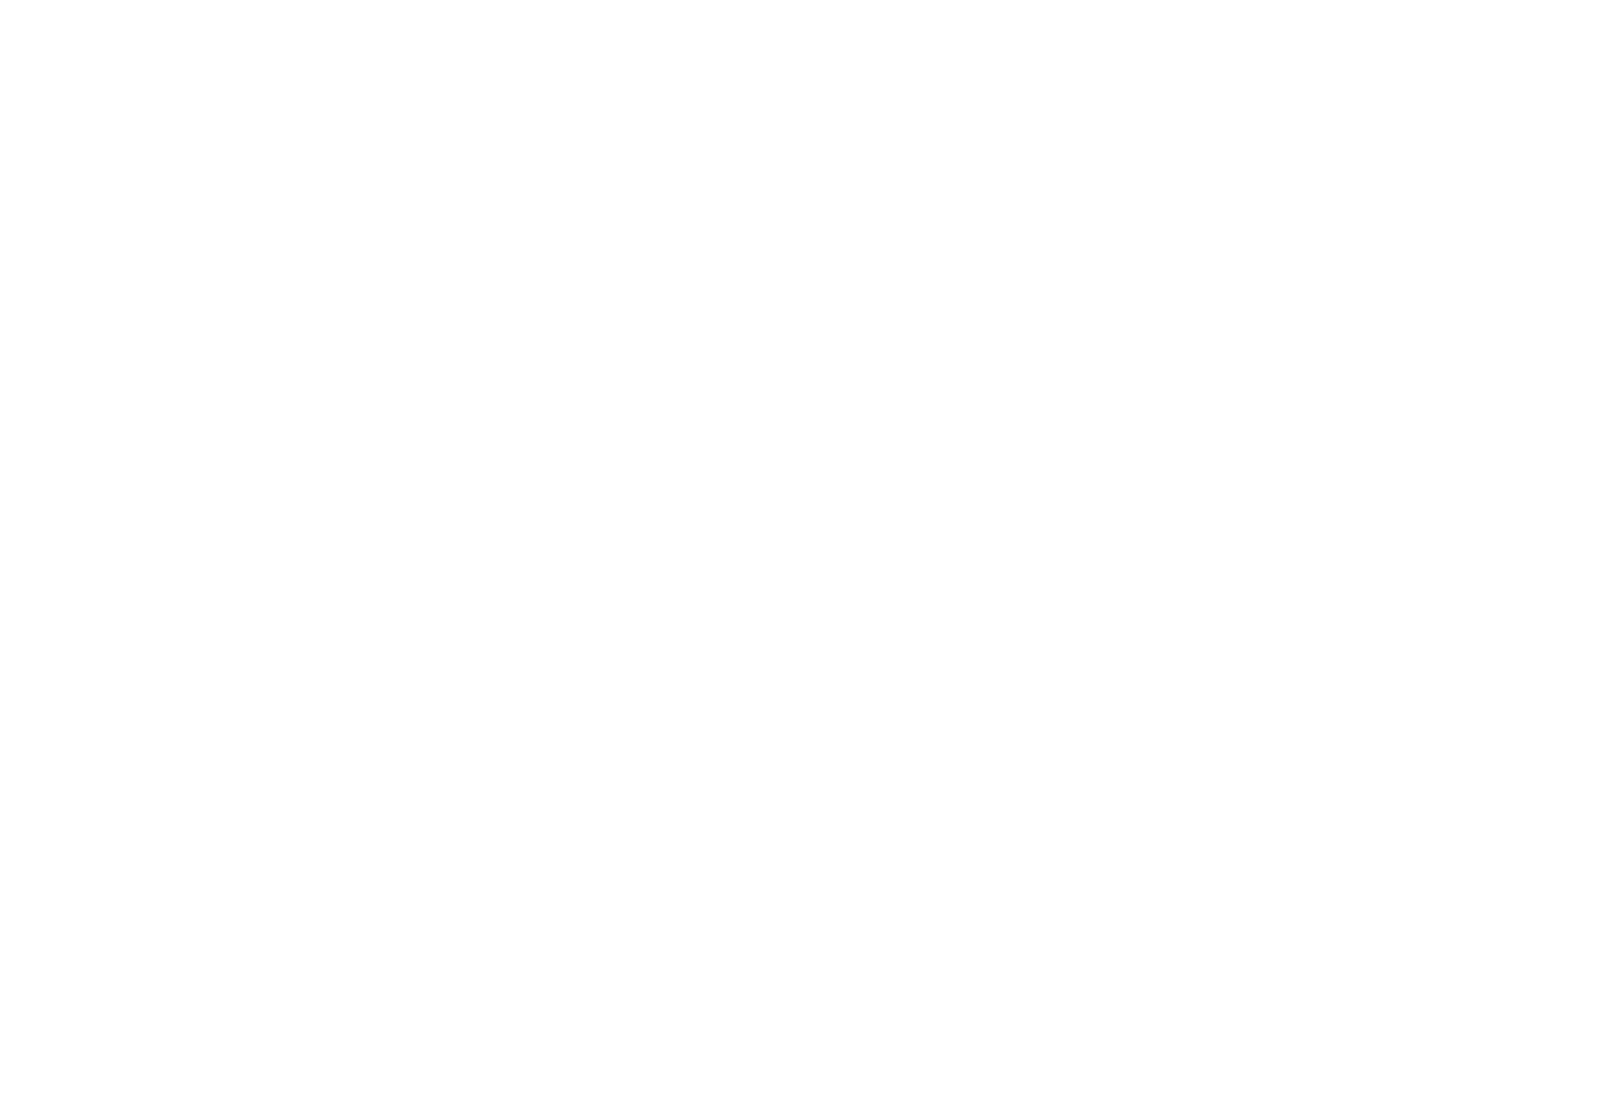

In [3]:
def scatter():
    cat4 = df_cleaned.where(df_cleaned['c4'])
    cat3 = df_cleaned.where(df_cleaned['c3'])
    cat2 = df_cleaned.where(df_cleaned['c2'])
    cat1 = df_cleaned.where(df_cleaned['c1'])
    
    
    param1 = param[0]
    param2 = param[1]
    #param1 = 'scapula_r_z'
    #param2 = 'humerus_r_z'
    
    plt.plot(cat3[param1], cat3[param2], '.', color='red', markersize=2)
    plt.plot(cat1[param1], cat1[param2], '.', color='cyan', markersize=2)
    plt.plot(cat2[param1], cat2[param2], '.', color='green', markersize=2)
    plt.plot(cat4[param1], cat4[param2], '.', color='blue', markersize=2)
    plt.title(param1+'/'+param2)
    plt.ylabel(param1)
    plt.xlabel(param2);

#    plt.plot(cat3[param[0]], cat3[param[1]], '.', color='red', markersize=2)
#    plt.plot(cat1[param[0]], cat1[param[1]], '.', color='cyan', markersize=2)
#    plt.plot(cat2[param[0]], cat2[param[1]], '.', color='green', markersize=2)
#    plt.plot(cat4[param[0]], cat4[param[1]], '.', color='blue', markersize=2)
#    plt.title(param[0]+'/'+param[1])
#    plt.ylabel(param[1])
#    plt.xlabel(param[0]);
    #plt.xlim(-4000,4000)
    #plt.ylim(-3500,3500)
scatter()



In [4]:
def logit(z):
    return 1.0 / (1.0 + np.exp(-z))

def h(X, theta):
    return logit(X * theta)

def predict(X, theta):
    return h(X, theta) >= 0.5

def fit_model(X, y, alpha=0.00001, iterations=50000):
    ErrerPerIter = []
    m = X.shape[1]            # het aantal coefficienten
    print(m)
    theta = np.zeros((m, 1))  # initialiseer theta
    for iter in range(iterations):
        theta -= (alpha / m) * X.T * ( h(X, theta) - y )
        if(iter % 100 == 0):
            ErrerPerIter.append(evaluate(theta, X, y).item(0))
    return (theta, ErrerPerIter)

def evaluate(theta, X, y):
    return sum( predict(X, theta) == y ) / len(X)

def plot_decision_boundary(theta):
    ax = plt.gca()
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    print(x_min,x_max)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                         np.arange(y_min, y_max, 1))

    X = np.matrix(np.vstack([np.ones(xx.shape[0] * xx.shape[1]), xx.ravel(), yy.ravel()])).T
    boundary = logit(X * theta)
    boundary = boundary.reshape(xx.shape)

    ax.contour(xx, yy,
           boundary,
           levels=[0.5])
    

In [8]:
%%time
theta, Learningrate = fit_model(X, y)
print(theta)


28
[[-0.42451174]
 [-0.05407938]
 [ 0.05557429]
 [ 0.01276633]
 [ 0.10916331]
 [ 0.00988306]
 [-0.10471294]
 [-0.03145409]
 [ 0.00549053]
 [ 0.02243152]
 [-0.00824052]
 [-0.0046304 ]
 [ 0.0050682 ]
 [ 0.00587012]
 [-0.09882689]
 [ 0.00595018]
 [-0.02122174]
 [ 0.02121209]
 [-0.01797852]
 [ 0.02156516]
 [-0.03778919]
 [-0.00746997]
 [-0.03881889]
 [ 0.14402231]
 [-0.01175837]
 [-0.00526216]
 [ 0.12773373]
 [ 0.08946685]]
CPU times: user 26min 42s, sys: 10.6 s, total: 26min 53s
Wall time: 1min 7s


In [9]:
evaluate(theta, X, y)

matrix([[ 0.9665228]])

In [10]:
scatter()
plot_decision_boundary(theta[0:3])

-11.5830731735 243.245073389


In [11]:
x = predict(X, theta)

#df['predict'] = x
#writer = pd.ExcelWriter('output.xlsx')
#df.to_excel(writer,'Sheet1')

TP = 0
for i in range(x.shape[0]):
    if x[i] == y[i] == True:
        TP = TP+1

TN = 0
for i in range(x.shape[0]):
    if x[i] == y[i] == False:
        TN = TN+1

FP = 0
for i in range(x.shape[0]):
    if (x[i] == True) and (y[i] == False):
        FP = FP+1

FN = 0
for i in range(x.shape[0]):
    if (x[i] == False) and (y[i] == True):
        FN = FN+1

tab = [["pred pos", TP, FP], ["pred neg", FN, TN]]
print(pd.DataFrame(tab, columns=["", "pos", "neg"]))
print()
print("recall", TP/(TP+FN))
print("precision", TP/(TP+FP))
print("accuracy", (TP+TN)/(TP+TN+FP+FN))


             pos   neg
0  pred pos  292    68
1  pred neg  219  7994

recall 0.5714285714285714
precision 0.8111111111111111
accuracy 0.9665228041525721


In [12]:
## test set
df = df_cleaned[df_cleaned.index % 20 == 1] 
X2 = np.matrix(df[tmp])
y2 = np.matrix(df[['c4']])

x = predict(X2, theta)

#df['predict'] = x
#df.to_excel(writer,'Sheet2')
#writer.save()

TP = 0
for i in range(x.shape[0]):
    if x[i] == y2[i] == True:
        TP = TP+1

TN = 0
for i in range(x.shape[0]):
    if x[i] == y2[i] == False:
        TN = TN+1

FP = 0
for i in range(x.shape[0]):
    if (x[i] == True) and (y2[i] == False):
        FP = FP+1

FN = 0
for i in range(x.shape[0]):
    if (x[i] == False) and (y2[i] == True):
        FN = FN+1

tab = [["pred pos", TP, FP], ["pred neg", FN, TN]]
print("resultaten op testset")
print(pd.DataFrame(tab, columns=["", "pos", "neg"]))
print()
print("recall", TP/(TP+FN))
print("precision", TP/(TP+FP))
print("accuracy", (TP+TN)/(TP+TN+FP+FN))


resultaten op testset
             pos   neg
0  pred pos  299    70
1  pred neg  215  7988

recall 0.5817120622568094
precision 0.8102981029810298
accuracy 0.9667522165188988


<IPython.core.display.Javascript object>


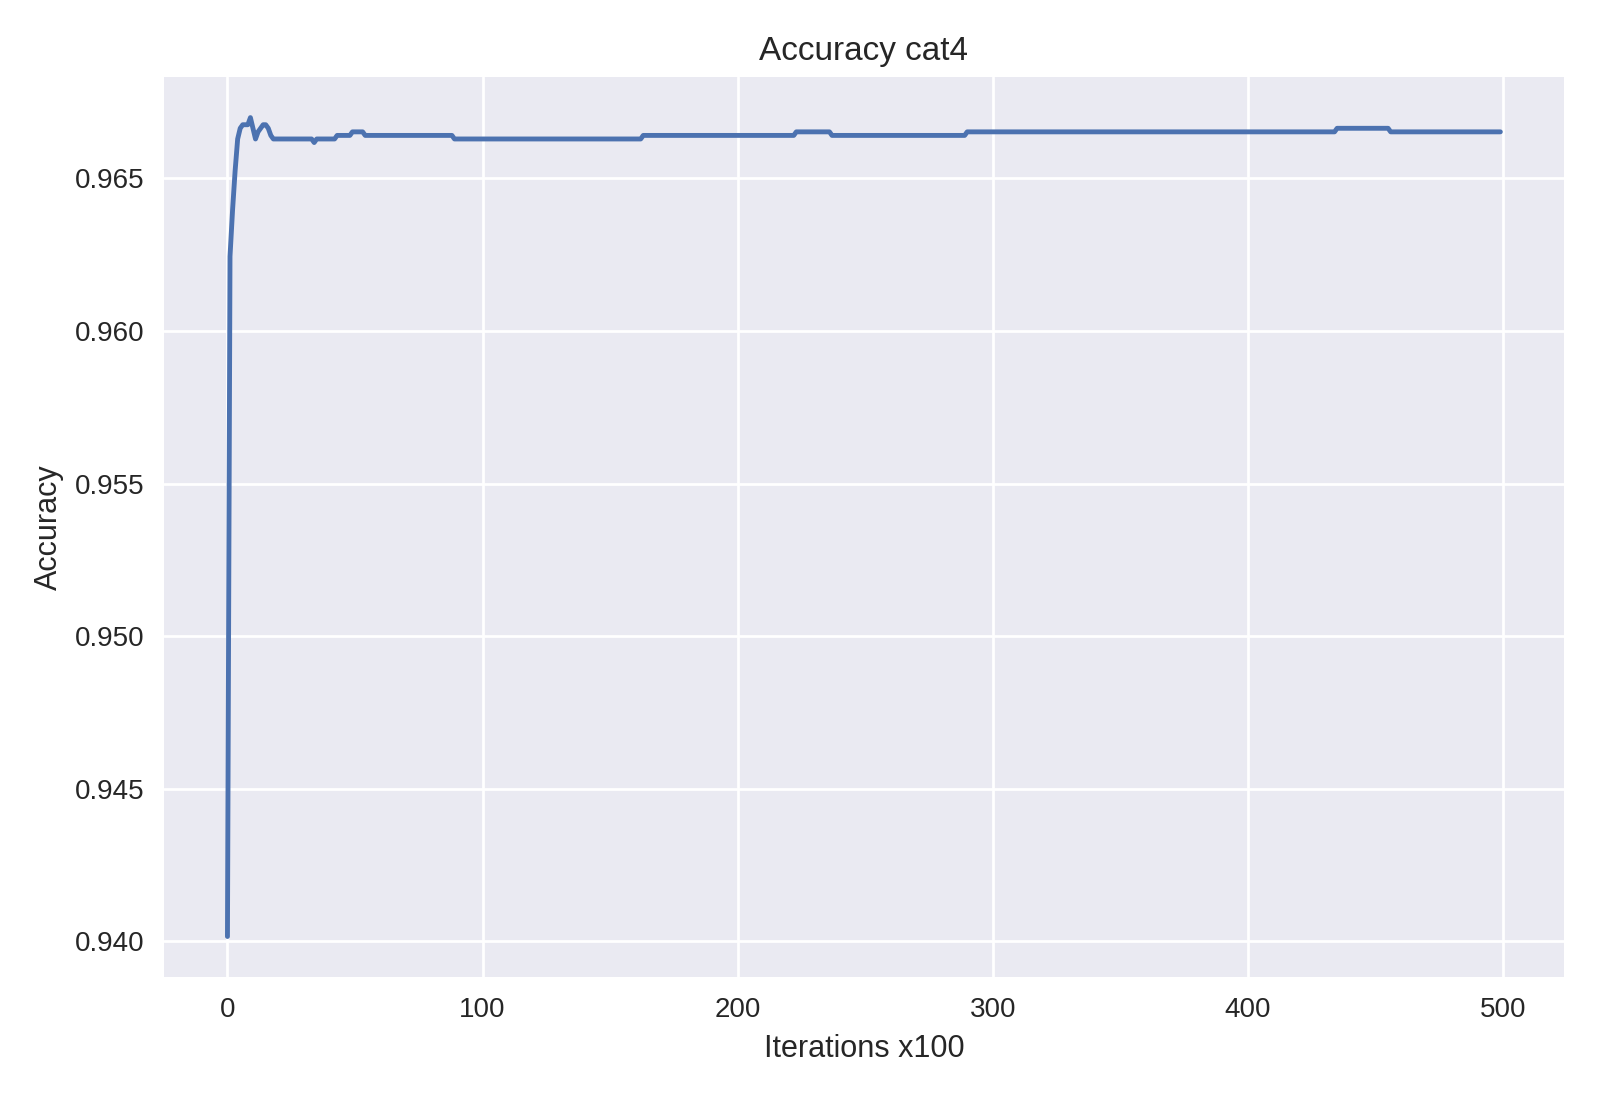

In [14]:
plt.close()
plt.clf()
plt.plot(Learningrate)
plt.xlabel('Iterations x100')
plt.ylabel('Accuracy')
plt.title('Accuracy cat4')
plt.tight_layout()
plt.show()